In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visa_df=pd.read_csv(r"C:\Users\hp\Documents\Data Science\Naresh IT\EDA with Python\Visadataset - Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Box Plot**

{'whiskers': [<matplotlib.lines.Line2D at 0x1b397d4f950>,
 'caps': [<matplotlib.lines.Line2D at 0x1b397d58b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b397d34f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1b397d59c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b397d5a4d0>],
 'means': []}

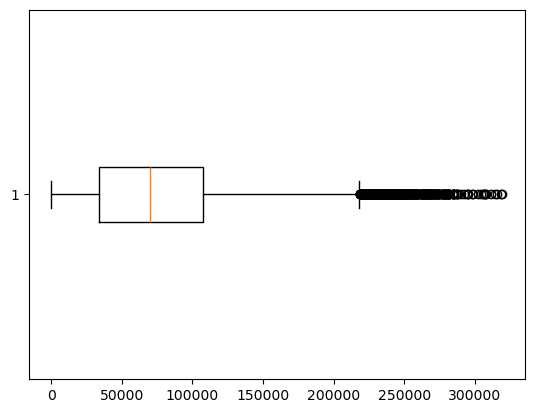

In [5]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)

<Axes: >

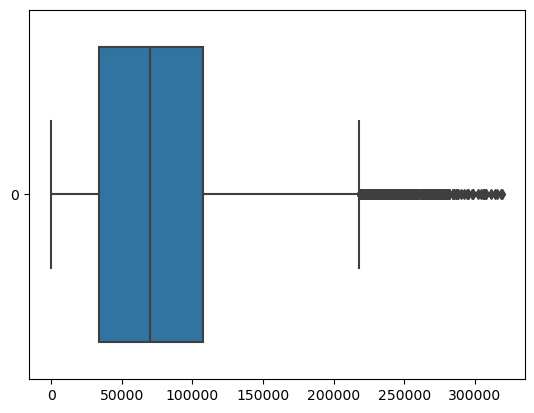

In [9]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')

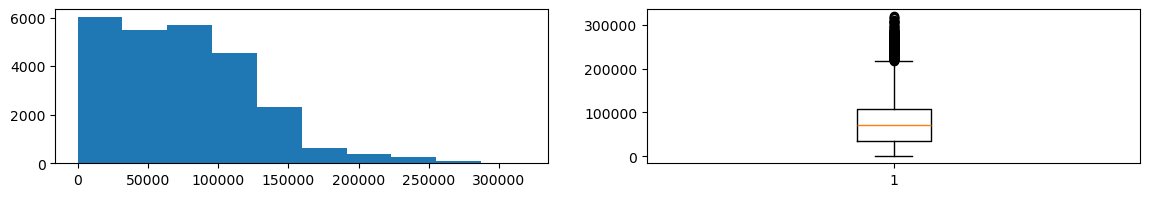

In [4]:
plt.figure(figsize=(14,2))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the outlier**

- Outliers are availabe less than q1-1.5*IQR
- Outliers are availabe greater than q3+1.5*IQR

- Step:1
   - calculate Q1
   - calculate Q3
   - Calculate IQR: Q3-Q1
- Step-2:
   - LB=Q1-1.5*IQR
   - UB=Q3+1.5*IQR
- Step-3:
  - con1=visa_df['prevailing_wage']<LB
  - con2=visa_df['prevailing_wage']>UB
  - apply OR operator and get the outliers data

In [15]:
q1=min(visa_df['prevailing_wage'])
q2=max(visa_df['prevailing_wage'])
lb=q1-1.5

In [5]:
Q1 = np.percentile(visa_df['prevailing_wage'], 25)
Q3 = np.percentile(visa_df['prevailing_wage'], 75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers=visa_df[con1 | con2]
len(outliers)

427

In [25]:
# this above is outliers data

**Non outliers Data**

In [4]:
Q1 = np.percentile(visa_df['prevailing_wage'], 25)
Q3 = np.percentile(visa_df['prevailing_wage'], 75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

{'whiskers': [<matplotlib.lines.Line2D at 0x289a76c74d0>,
 'caps': [<matplotlib.lines.Line2D at 0x289a76dd7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x289a6f19290>],
 'medians': [<matplotlib.lines.Line2D at 0x289a76ec8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x289a76f0250>],
 'means': []}

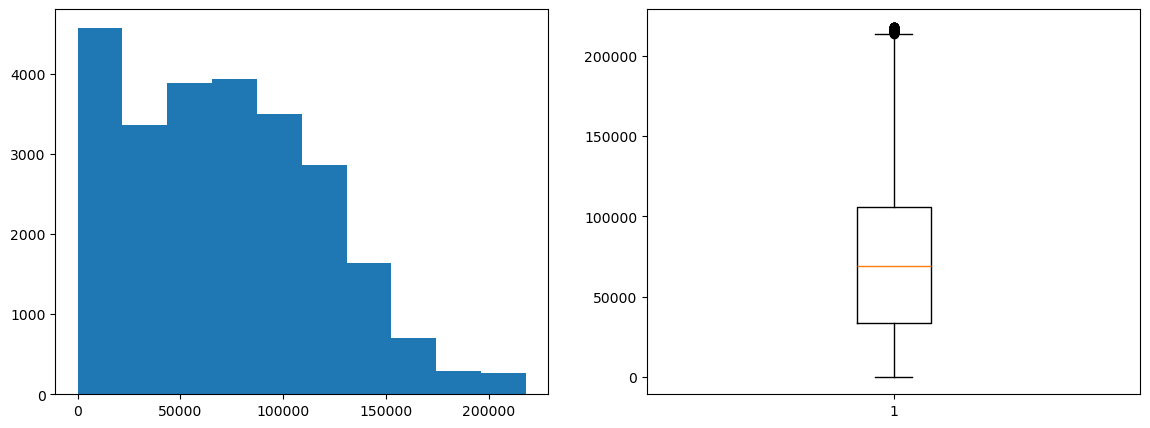

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])

**Comparing total data with non outliers data**

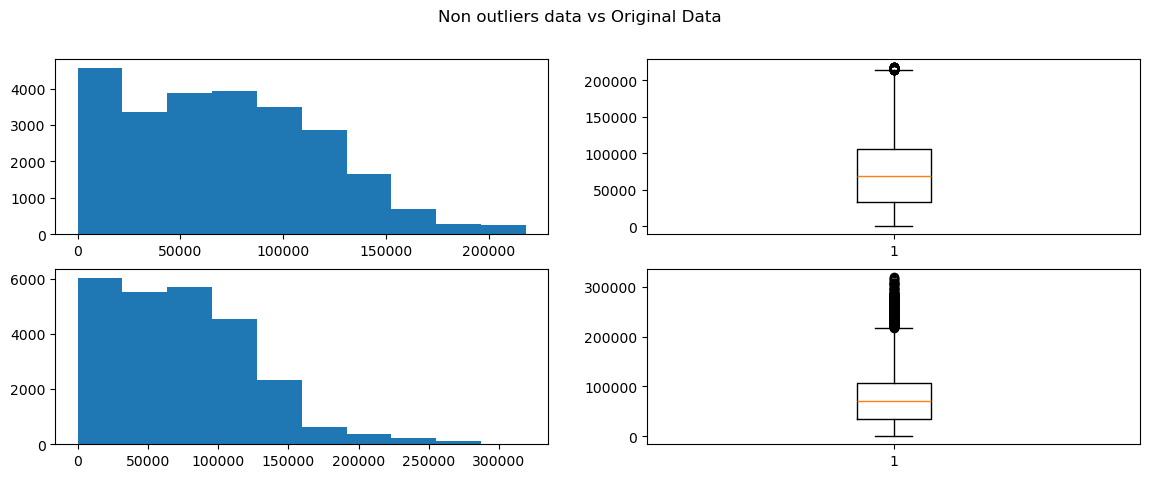

In [10]:
plt.figure(figsize=(14,5))

plt.suptitle("Non outliers data vs Original Data")
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])

plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])
plt.show()

(array([4580., 3368., 3890., 3942., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

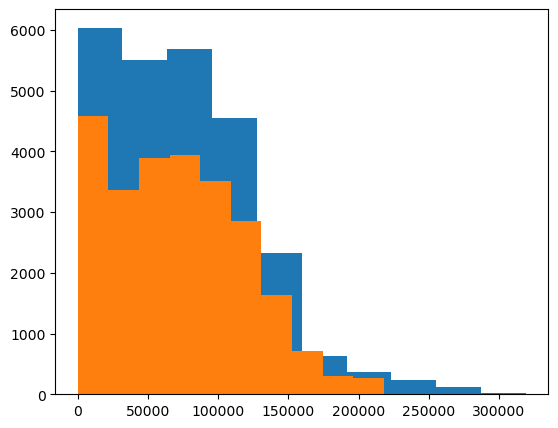

In [12]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])

**How to deal with outliers**

**method- 1**
- Drop the outliers

    - not a good idea
    - when you drop the oultiers all the rows data will loss
    - eg: here we are droping 427 rows
    - x % of 25480 =427
    - it is 1.7% of data, here it is fine

**Method-2**
- Fill with median value
   - we know that outliers does not affect the median
   - so we can fill outliers with median

**Method-3**
- Cap the values with Q1 and Q3
     - all less than bound we can replace with q1 or LB
     - all greater than upper bound, we can replace with q3 or UB

$Fill with Median$

- create a empty list
- iterate the visa_df['prevailing_wage'].values
- if each value <lb or >ub then append with median value, else append with i value

{'whiskers': [<matplotlib.lines.Line2D at 0x289abad8990>,
 'caps': [<matplotlib.lines.Line2D at 0x289af7c0c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x289afba55d0>],
 'medians': [<matplotlib.lines.Line2D at 0x289af82d150>],
 'fliers': [<matplotlib.lines.Line2D at 0x289aba8c5d0>],
 'means': []}

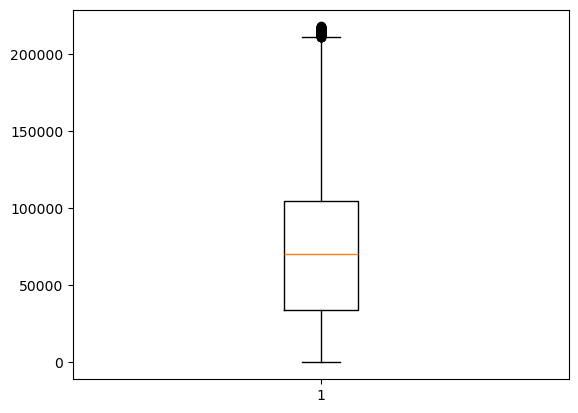

In [19]:
l=[]
med=visa_df['prevailing_wage'].median()
Q1 = np.percentile(visa_df['prevailing_wage'], 25)
Q3 = np.percentile(visa_df['prevailing_wage'], 75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
for i in visa_df['prevailing_wage'].values:
    if i<LB or i>UB:
        l.append(med)
    else:
        l.append(i)
visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=l
plt.boxplot(visa_df_copy['prevailing_wage'])


**np.where()**

- will use binary condn
- It has 3 arguments
   - condition
   - value if condition is True
   - value if condition False

In [20]:
d={"sub":['DS',"ML",'CS'],"Marks":[100,150,20]}
data=pd.DataFrame(d)


# MArks column replace with 1 when value >100 
# else same value
#Marks   New_Marks
#100     100
#150      1
#20       20

In [21]:
data

,sub,Marks
0,DS,100
1,ML,150
2,CS,20


In [23]:
con=data['Marks']>100
l=np.where(con,1,data['Marks'])
l
# 1 if true
# false original value

array([100,   1,  20], dtype=int64)

In [25]:
con2=visa_df['prevailing_wage']>1000
l2=np.where(con2,1,visa_df['prevailing_wage'])
l2

array([592.2029,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ])